*week 2 exercise - part 1*

# Basic Charts with Matplotlib

## Matplotlib

First, we import the required libraries, using standard conventions. We first import numpy for all our mathematical needs, then the matplotlib as plotting library and pyplot which gives an easy API to create plots with matplotlib. Later we will introduce Seaborn as well.

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# we need the following line to indicate that the plots should be shown inline with the Jupyter notebook.
%matplotlib inline 

We will first create a simple plot of a mathematical function. We first create a numpy array of x-values. Then for each x-value we create the y-value, i.e. the function value. Plotting this function is as easy as giving it the x and y values.

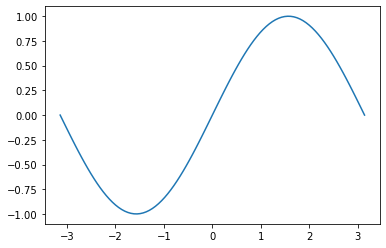

In [2]:
X = np.linspace(-np.pi, np.pi, 100) # define a NumPy array with 100 points in the range -Pi to Pi
Y = np.sin(X)  # define the curve Y by the sine of X

plt.plot(X,Y); # use matplotlib to plot the function

While creating such plots is perfectly fine when you are exploring data, in your final notebook the plot is hard to understand for the reader. With matplotlib it is very easy to add labels, a title and a legend. You can also change the limits of the plot, the style of the lines and much more.

The following could be seen as the bare minimum for a plot to be understood as part of reproducible research.

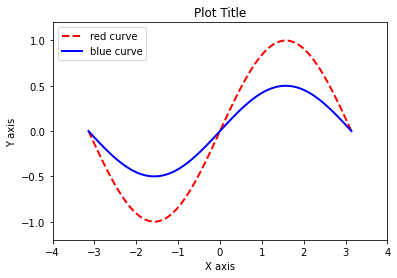

In [3]:
plt.plot(X, Y, 'r--', linewidth=2)
plt.plot(X, Y/2, 'b-', linewidth=2)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Plot Title')
plt.xlim(-4, 4)
plt.ylim(-1.2, 1.2)
plt.legend(['red curve', 'blue curve'], loc='best')

Go to the documentation pages of Matplotlib [http://matplotlib.org/contents.html](http://matplotlib.org/contents.html) to find all the possible options for a plot and also to see more tutorials, videos and book chapters to help you along the way.

Another nice tutorials:
* [http://www.labri.fr/perso/nrougier/teaching/matplotlib/](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

This assignment first shows you how to download csv data from an online source. Then we're exploring a dataset of all the cities in the world and compare cities in The Netherlands to the rest of the world.

## Loading data CSV and Pandas
We will work with a database of information about cities around the world:

[https://dev.maxmind.com/geoip/geoip2/geolite2/](https://dev.maxmind.com/geoip/geoip2/geolite2/)

Working with data structures can be done in many ways in Python. There are the standard Python arrays, lists and tuples. You can also use the arrays in the numpy package which allow you to do heavy math operations efficiently. For data analysis Pandas is often used, because data can be put into so-called dataframes. Dataframes store data with column and row names and can easily be manipulated and plotted. You will learn more about Pandas in the Machine Learning workshops. A short intro can be found here:

https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [4]:
import urllib.request as urllib, zipfile, os

url = 'https://github.com/CODAIT/redrock/raw/master/twitter-decahose/src/main/resources/Location/'
filename = 'worldcitiespop.txt.gz'
datafolder = 'data/'

In [5]:
downloaded = urllib.urlopen(url + filename)
buf = downloaded.read()

try:
    os.mkdir(datafolder)
except FileExistsError:
    pass

with open(datafolder + filename, 'wb') as f:
    f.write(buf)

In [6]:
import pandas as pd
# reading files may cause problems or give errors... Can you explain the use of the encoding parameter?
cities = pd.read_csv(datafolder + filename, sep=',', low_memory=False, encoding = 'ISO-8859-1')

### Maybe because the file was encoded with ISO-8859-1 so if we decode it using a different way it will cause problems

## Data Manipulation

We can take a peek at the data by checking out the final rows of data. Do you see any potential problem with this dataset?

In [7]:
cities.tail(10)

,Country,City,AccentCity,Region,Population,Latitude,Longitude
3173948,zw,zibalonkwe,Zibalonkwe,06,NaN,-19.833333,27.466667
3173949,zw,zibunkululu,Zibunkululu,06,NaN,-19.666667,27.616667
3173950,zw,ziga,Ziga,06,NaN,-19.216667,27.483333
3173951,zw,zikamanas village,Zikamanas Village,00,NaN,-18.216667,27.950000
3173952,zw,zimbabwe,Zimbabwe,07,NaN,-20.266667,30.916667
3173953,zw,zimre park,Zimre Park,04,NaN,-17.866111,31.213611
3173954,zw,ziyakamanas,Ziyakamanas,00,NaN,-18.216667,27.950000
3173955,zw,zizalisari,Zizalisari,04,NaN,-17.758889,31.010556
3173956,zw,zuzumba,Zuzumba,06,NaN,-20.033333,27.933333
3173957,zw,zvishavane,Zvishavane,07,79876.0,-20.333333,30.033333


### There are some missing values when it comes to the population

In [8]:
cities.sort_values(by='Population', ascending=False).head(10)

,Country,City,AccentCity,Region,Population,Latitude,Longitude
1544449,jp,tokyo,Tokyo,40,31480498.0,35.685000,139.751389
570824,cn,shanghai,Shanghai,23,14608512.0,31.045556,121.399722
1327914,in,bombay,Bombay,16,12692717.0,18.975000,72.825833
2200161,pk,karachi,Karachi,05,11627378.0,24.905600,67.082200
1349146,in,new delhi,New Delhi,07,10928270.0,28.600000,77.200000
1331162,in,delhi,Delhi,07,10928270.0,28.666667,77.216667
2130459,ph,manila,Manila,D9,10443877.0,14.604200,120.982200
2461968,ru,moscow,Moscow,48,10381288.0,55.752222,37.615556
1626528,kr,seoul,Seoul,11,10323448.0,37.598500,126.978300
316800,br,sao paulo,São Paulo,27,10021437.0,-23.473293,-46.665803


By sorting the cities on population we immediately see the entries of a few of the largest cities in the world.

## Assignment 1a
To get an idea of where in the world the cities in the dataset are located, we want to make a scatter plot of the position of all the cities in the dataset.

Don't worry about drawing country borders, just plot the locations of the cities.

Remember to use all the basic plot elements you need to understand this plot.

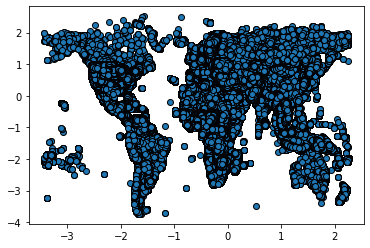

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline 


axis = cities[['Latitude', 'Longitude']]
graph_line = cities['City']

scaler_axis = StandardScaler().fit(axis)
axis = scaler_axis.transform(axis)

plt.scatter(axis[:,1], axis[:,0], edgecolors='k')

## Your code and explanation in comments...

### I make a scatterplot by using the longitude and latitude as an axis, and the city as a dots.

## Assignment 1b

Now we want to plot the cities in The Netherlands only. Use a scatter plot again to plot the cities, but now vary the size of the marker and the color with the population of that city.

Use a colorbar to show how the color of the marker relates to its population.

Use sensible limits to your axes so that you show only mainland The Netherlands (and not the Dutch Antilles).

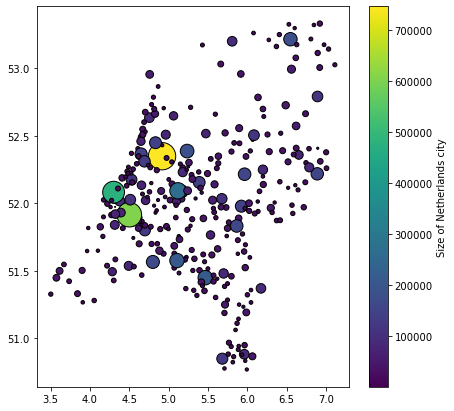

In [10]:
## Your code and explanation in comments...

## Split data
dutch_cities = cities[ cities['Country'] =='nl' ]

plt.figure(figsize=[7,7]);
axis = dutch_cities[['Latitude', 'Longitude']]
graph_line = dutch_cities['City']
size=dutch_cities['Population']
## Divide for reablity
small_size = size / 1000
plt.scatter(dutch_cities['Longitude'],dutch_cities['Latitude'],s=small_size, c=size ,edgecolors='k')

## Set color
plt.colorbar(label='Size of Netherlands city');


### I make a new dataset that consists of only dutch cities, then to make the size of the dots I use the population in each city. I divide the population data by 1000 so we can make it reable.

## Assignment 1c

Using assignment B, we could clearly see larger cities such as Amsterdam, Rotterdam and even Eindhoven. But we still do not really have a clear overview of how many big cities there are. To show a distribution we use a histogram plot.

What happens if we do not call the .dropna() function?

Add proper basic plot elements to this plot and try to annotate which data point is Amsterdam and Eindhoven.

Text(0.5, 1.0, 'Dutch City Population')

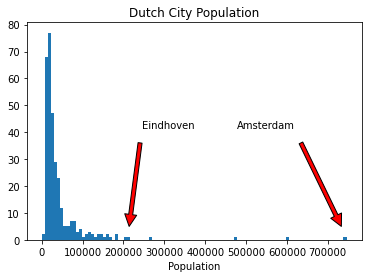

In [29]:
dutch_cities.dropna().head(5)
Amsterdam = dutch_cities[dutch_cities['AccentCity'] =='Amsterdam']
Eindhoven = dutch_cities[dutch_cities['AccentCity'] =='Eindhoven']
plt.figure();

plt.annotate('Amsterdam',(Amsterdam['Population'],1),xytext=(0.8, 0.55), textcoords='axes fraction',
            arrowprops=dict(facecolor='red', shrink=0.10),
            horizontalalignment='right', verticalalignment='top')
plt.annotate('Eindhoven',(Eindhoven['Population'],1),xytext=(0.5, 0.55), textcoords='axes fraction',
            arrowprops=dict(facecolor='red', shrink=0.10),
            horizontalalignment='right', verticalalignment='top')
      
plt.hist(np.asarray(dutch_cities.dropna().Population), 100,label='ss');


plt.xlabel("Population")
plt.title("Dutch City Population")

# Your code and explanation in comments...
# Without dropna we would have null values. Dropna removes null values.


### We take only Eindhoven and Amsterdam and we make an arrow towards those 2 points on the plot so we can clrearly see how big each city is 

## Assignment 1d

Now we want to compare how the distribution of Dutch cities compares to that of the entire world.

Use subplots to show the dutch distribution (top plot) and the world distribution (bottom plot).

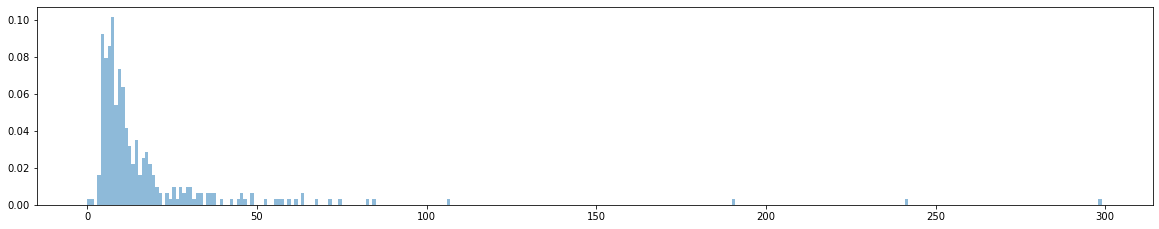

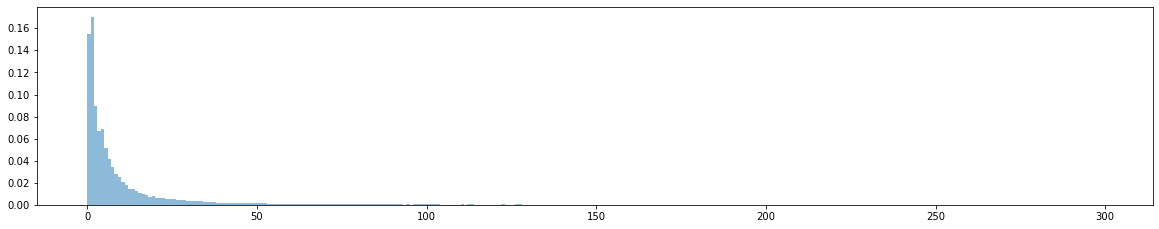

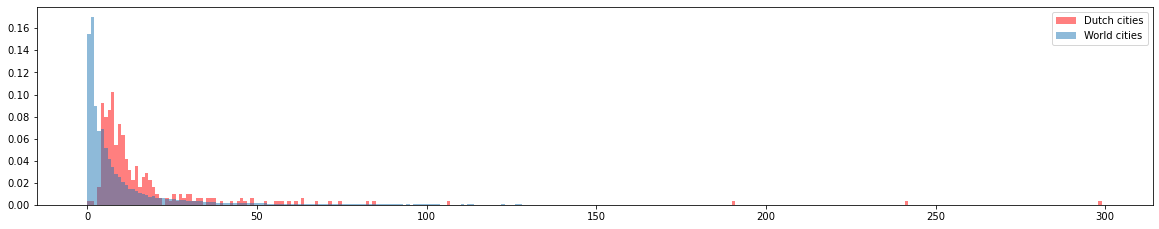

In [36]:
# Add the subplot of the world cities below this Dutch one


## Your code and explanation in comments...

plt.figure(figsize=[20, 8]);
plt.subplot(2,1,1);

plt.hist(dutch_cities.dropna().Population/2500, bins=np.arange(0, 300, 1), density=10,alpha=0.5);

plt.figure(figsize=[20, 8]);
plt.subplot(2,1,1);
plt.hist(cities.dropna().Population/2500, bins=np.arange(0, 300, 1), density=10,alpha=0.5);


plt.figure(figsize=[20, 8]);
plt.subplot(2,1,1);
plt.hist(dutch_cities.dropna().Population/2500, bins=np.arange(0, 300, 1), density=10,alpha=0.5,color = 'red',label = 'Dutch cities');
plt.hist(cities.dropna().Population/2500, bins=np.arange(0, 300, 1), density=10,alpha=0.5,label = 'World cities');
plt.legend(loc='upper right')



## Assignment 1e

Write what conclusions you can deduce from the above plots?

### We can see in the histogram plot that dutch cities have more densely populated cities compared to the world

*week 2 exercise - part 2*

# Data visualization: Two additional Chart Types for Exploring

This assignment first shows two useful chart types: parallel coordinates and scatter matrix. You will practice these plots using a new dataset.

## Parallel Coordinates with Pandas

First, we import the required libraries, using standard conventions. For the example of parallel coordinates we shall use the famous iris data set, describing the sepal and petal dimensions for three types of irises.

In [13]:
import pandas as pd
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', sep=',', low_memory=False, encoding = 'ISO-8859-1', header=None)
iris.columns = ['sepal width','sepal length','petal width','petal length', 'name']

iris.head()

,sepal width,sepal length,petal width,petal length,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now we do not use matplotlib directly but use a plot function of the pandas library that uses matplotlib in the background. In this case we create a parallel coordinates plot.

Pandas has many plotting function as can be seen here: http://pandas.pydata.org/pandas-docs/stable/visualization.html#parallel-coordinates

The parallel coordinates plot can give insight into a dataset with a large number of features. For the iris set there are four features (petal width, petal length, sepal width, sepal length).

While you can make a scatter plot with 4 features using x,y,color and size; a parallel coordinates plot is usually easier to understand once you know how to read it. Here would be the scatter plot:

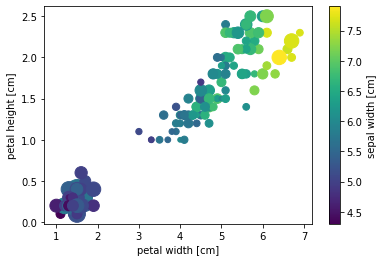

In [14]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

fig = plt.figure()
plt.scatter(iris['petal width'], iris['petal length'], c=iris['sepal width'], s=iris['sepal length']**4)
plt.xlabel('petal width [cm]')
plt.ylabel('petal height [cm]')
plt.colorbar(label='sepal width [cm]');

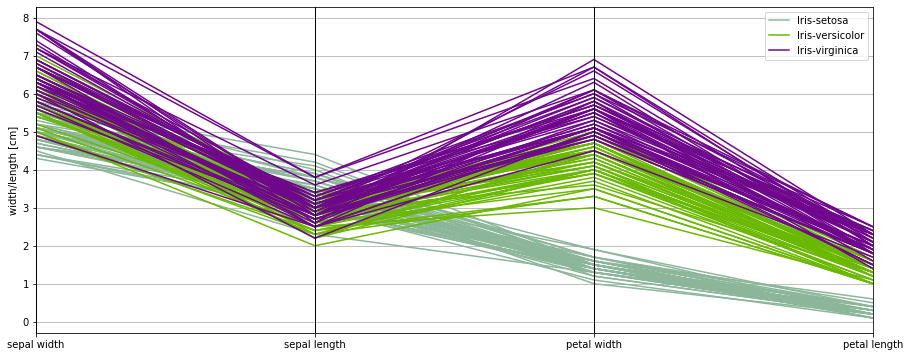

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import parallel_coordinates
%matplotlib inline 

fig = plt.figure(figsize=[15,6])
ax = parallel_coordinates(iris,'name')
ax.set_ylabel('width/length [cm]');

## Scatter Matrix with Pandas

A scatter matrix is a chart that gives you an overview of the correlations between any number of feaures.

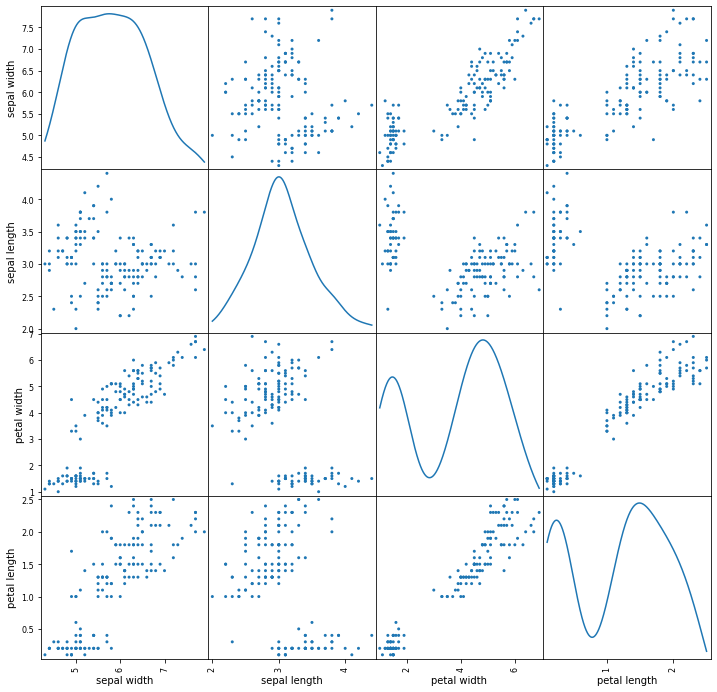

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris, alpha=1, figsize=(12, 12), diagonal='kde');

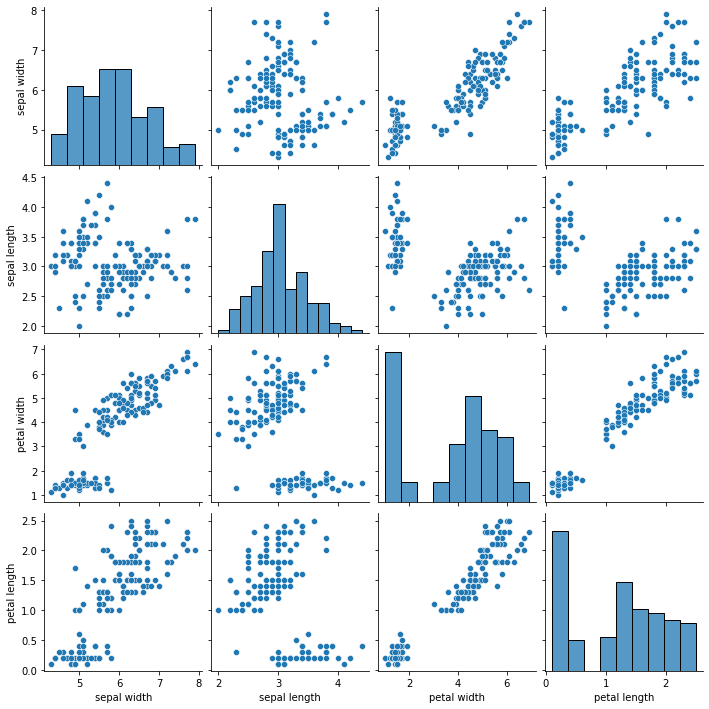

In [17]:
# or see what happens if we use the Seaborn library...
import seaborn as sns
sns.pairplot(iris)

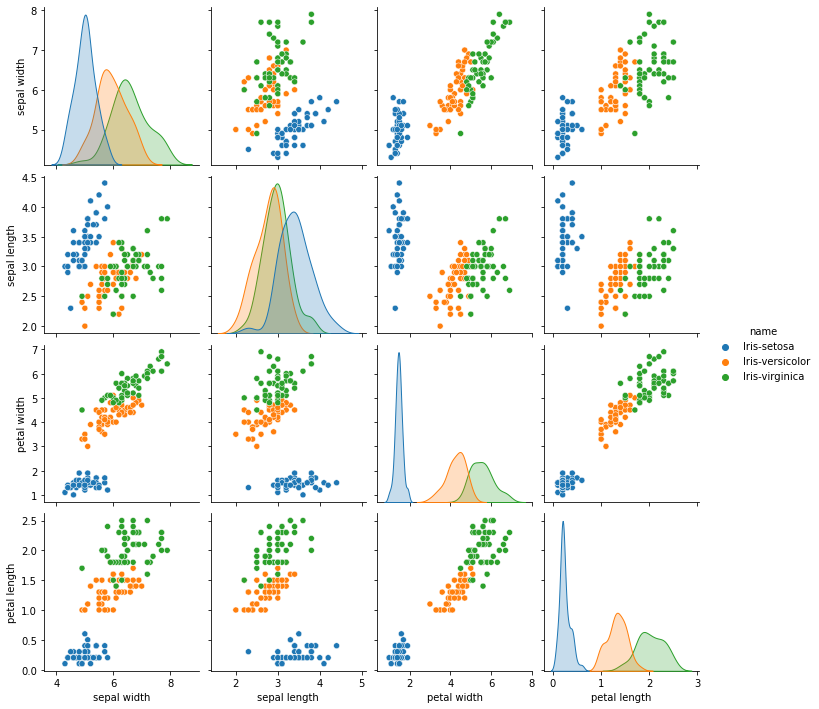

In [18]:
# Seaborn provides some simples ways to explore the data and correlations in more (visual) detail...
import seaborn as sns
sns.pairplot(iris, hue="name")

## Assignment
Now try to create similar plots for a new dataset about car features.

In [19]:
# The data file is quite nasty with several different delimeters that read_csv cannot handle very well
names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name','j','k','l','m','n']
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delimiter=r"\s+", names=names, header=None, engine='python')
# Create a subset of dataset with all useful features

car_model = cars.iloc[:,[6]]

cars = cars.iloc[:,[0,1,2,4,5,7]]

In [20]:
cars.head(10)
## Create the parallel coordinates plot here


,mpg,cylinders,displacement,weight,acceleration,origin
0,18.0,8,307.0,3504.0,12.0,1
1,15.0,8,350.0,3693.0,11.5,1
2,18.0,8,318.0,3436.0,11.0,1
3,16.0,8,304.0,3433.0,12.0,1
4,17.0,8,302.0,3449.0,10.5,1
5,15.0,8,429.0,4341.0,10.0,1
6,14.0,8,454.0,4354.0,9.0,1
7,14.0,8,440.0,4312.0,8.5,1
8,14.0,8,455.0,4425.0,10.0,1
9,15.0,8,390.0,3850.0,8.5,1


# Create a normalized dataset
using Mean normalization (see: https://en.wikipedia.org/wiki/Feature_scaling#Mean_normalization)

In [21]:
# extend this code to create adinates plot. What happens when you do not use the normalized data? normalized set
from sklearn import preprocessing

d = preprocessing.normalize(cars)
unkown = pd.DataFrame(d)

unkown.columns= ['mpg','cylinders','displacement','weight','acceleration','origin']

## We normalize the data and then we add the model year because we do not want the model year normalized

unkown['Model Year'] = car_model

unkown.head()


,mpg,cylinders,displacement,weight,acceleration,origin,Model Year
0,0.005117,0.002274,0.087278,0.996162,0.003412,0.000284,70
1,0.004044,0.002157,0.094350,0.995524,0.003100,0.000270,70
2,0.005216,0.002318,0.092154,0.995723,0.003188,0.000290,70
3,0.004642,0.002321,0.088205,0.996083,0.003482,0.000290,70
4,0.004910,0.002311,0.087226,0.996169,0.003033,0.000289,70


In [22]:
# extend this code to create adinates plot. What happens when you do not use the normalized data? normalized set
from sklearn import preprocessing

min_max_Scaler = preprocessing.MinMaxScaler()

col = cars.columns
result =  min_max_Scaler.fit_transform(cars)
cars_norm = pd.DataFrame(result)

cars_norm.columns= ['mpg','cylinders','displacement','weight','acceleration','origin']

## We normalize the data and then we add the model year because we do not want the model year normalized

cars_norm['Model Year'] = car_model

cars_norm

,mpg,cylinders,displacement,weight,acceleration,origin,Model Year
0,0.239362,1.0,0.617571,0.536150,0.238095,0.0,70
1,0.159574,1.0,0.728682,0.589736,0.208333,0.0,70
2,0.239362,1.0,0.645995,0.516870,0.178571,0.0,70
3,0.186170,1.0,0.609819,0.516019,0.238095,0.0,70
4,0.212766,1.0,0.604651,0.520556,0.148810,0.0,70
...,...,...,...,...,...,...,...
393,0.478723,0.2,0.186047,0.333711,0.452381,0.0,82
394,0.930851,0.2,0.074935,0.146583,0.988095,0.5,82
395,0.611702,0.2,0.173127,0.193365,0.214286,0.0,82
396,0.505319,0.2,0.134367,0.286929,0.630952,0.0,82


Next, create a parallel coordinates plot. What happens when you do not use the normalized data?

### If we do not normalize the data it makes the plots unreadable. If we normalize the data then we can actually get useful information.

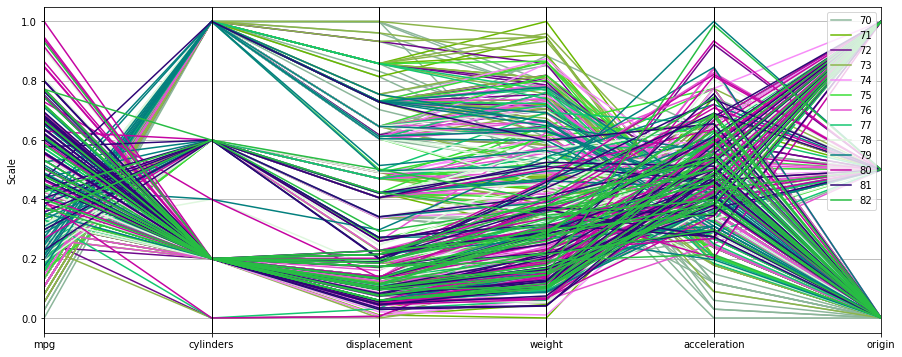

In [23]:
fig = plt.figure(figsize=[15,6])
ax = parallel_coordinates(cars_norm,'Model Year')
ax.set_ylabel('Scale');

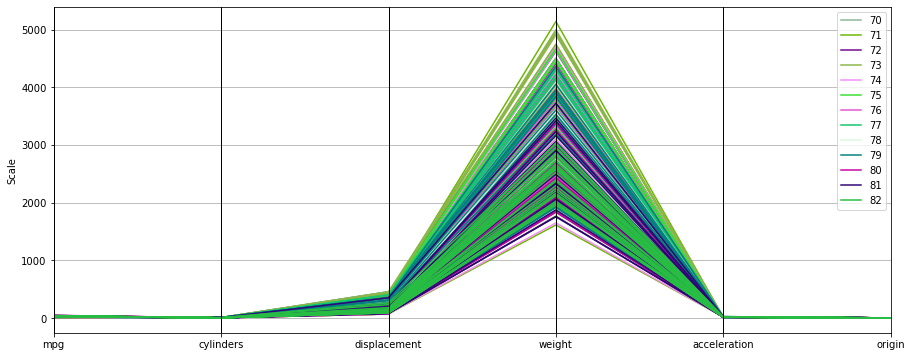

In [24]:
fig = plt.figure(figsize=[15,6])

cars['model year'] = car_model
ax = parallel_coordinates(cars,'model year')
ax.set_ylabel('Scale');

Answer this question: What conclusions can you make from the relation between weight and acceleration? If you don't understand how to interpret parallel coordinates plots, read: https://eagereyes.org/techniques/parallel-coordinates.


### We can see from the normalized plot that if a car has less weight i will have a higher acceleration


Next, try to highlight the model years >= 80. 

Hints: 
* you can slice your data with ```cars_norm[cars['model year']>=80]```.
* you can plot both all data and the sliced data on top of each other with different colors  

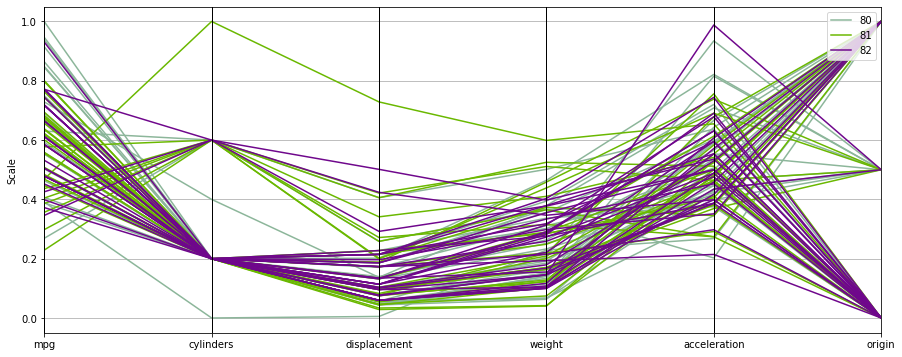

In [25]:
## Create the parallel coordinates plot here
fig = plt.figure(figsize=[15,6])
cars_normYear = cars_norm[cars['model year']>=80]
ax = parallel_coordinates(cars_normYear,'Model Year')
ax.set_ylabel('Scale');

Answer this question: what conclusions can you draw from cars with model years 80-82?

### We can see that with time the mpg of the cars goes down. We can see that there are some outliers when it comes to cars from 81 and 80. Cars from 82 typically have less cylinders and less displacement compared to 81. 

Now, create a scatter matrix for the car data. 
Do we need to use the normalized data?
Are we looking for a dataset that we can easily cluster or will we get more luck looking for trends?

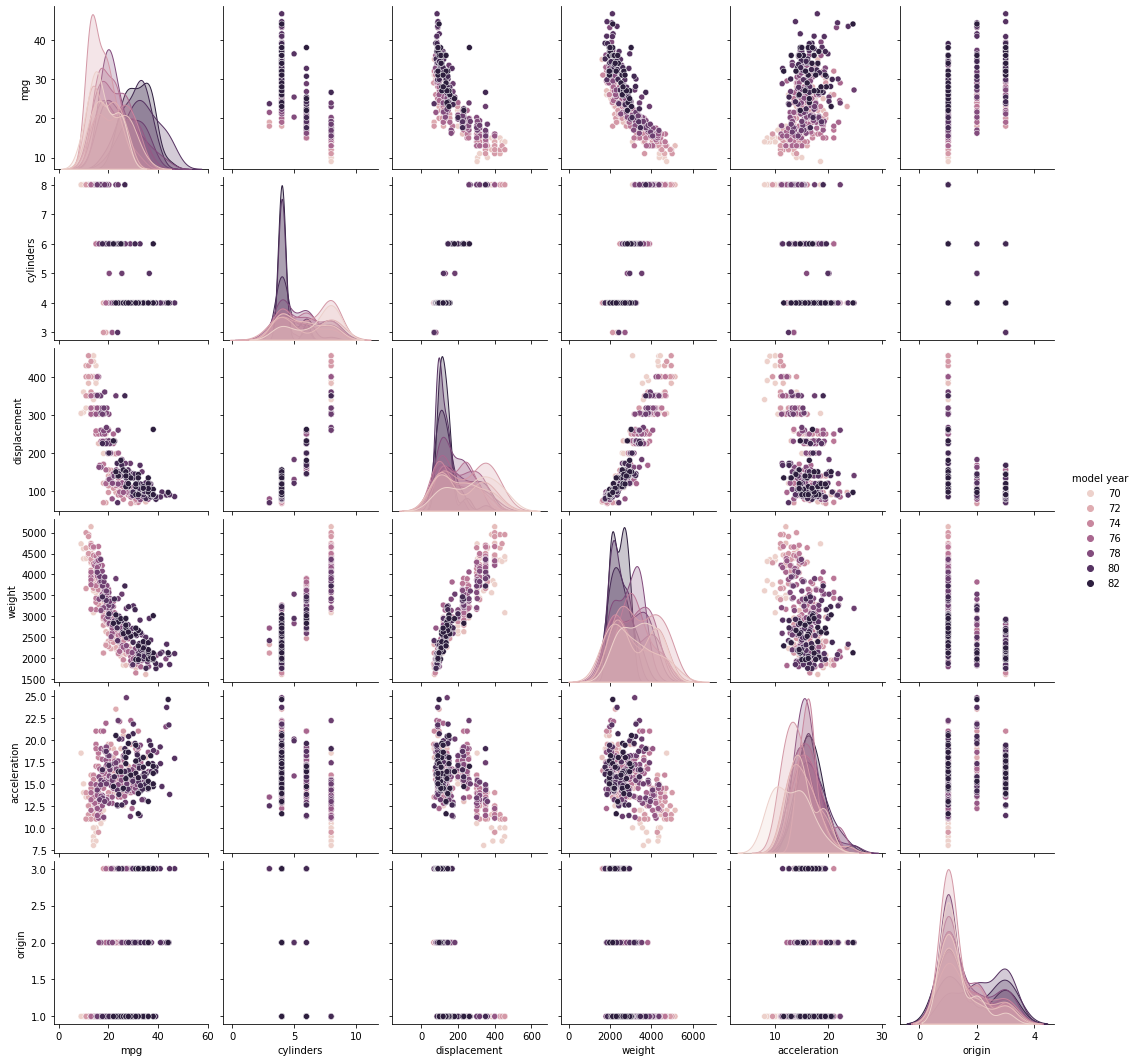

In [26]:
## Create the scatter matrix here
import seaborn as sns
cars['model year'] = car_model
sns.pairplot(cars, hue="model year")

### We can see that there is no need to normalize the data with a scatter matrix.

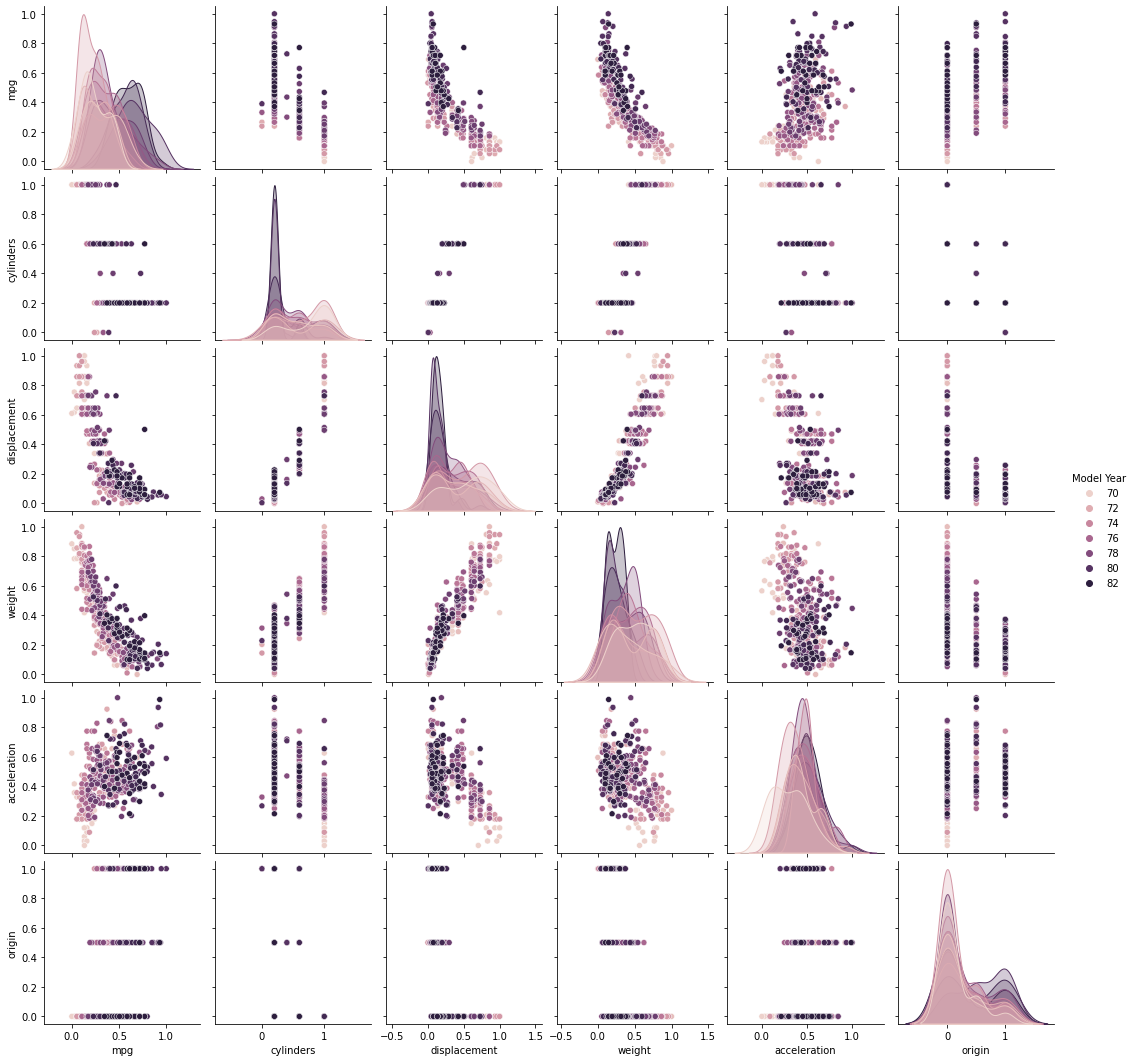

In [27]:
sns.pairplot(cars_norm, hue="Model Year")

*What are your final conclusions looking at the (visual) results? What did you learn about the data and dataset? Or what new questions did you derive from the plots you've made?*

### Overall we can see that in time cars become lighter / faster, burn less fuel and were made with less cylinders and with less displacement